#  1880-2010年间全美婴儿姓名

In [2]:
import pandas as pd 
names1880 = pd.read_csv("data/baby-names/names/yob1880.txt",names=["name","sex","births"])

In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
# 这些文件中仅含有当年出现超过5次的名字。为了简单起见，我们可以用births列的sex分组小计表 示该年度的births总计
''' 计算总出生人数用性别计算'''
names1880.groupby("sex").births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

# 统计全部文件的人数？

In [5]:

years = range(1880,2011)
pieces = []
columns = ["name","sex","births"]


In [6]:
for year in years:
    path ="data/baby-names/names/yob%d.txt"%year
    frame = pd.read_csv(path,names=columns)

    frame['year'] = year 

    pieces.append(frame)


In [7]:
#连接
names = pd.concat(pieces,ignore_index=True)

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692391,Zymaire,M,5,2010
1692392,Zyonne,M,5,2010
1692393,Zyquarius,M,5,2010
1692394,Zyran,M,5,2010


In [9]:
''' 有了这些数据之后，我们就可以利用groupby或pivot_table在year和sex级别上对其进行聚合'''
total_births = names.pivot_table("births",index="year",columns="sex",aggfunc=sum)

In [10]:
total_births.tail()

sex,F,M
year,,
2006,1900375,2054352
2007,1921655,2074427
2008,1889800,2038995
2009,1835873,1982310
2010,1776223,1917416


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

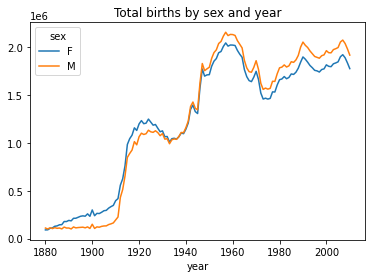

In [11]:
total_births.plot(title='Total births by sex and year')

In [12]:
'''下面我们来插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例(用生日来比较) '''
def add_prop(group):
    group["prop"] = group.births/group.births.sum()
    return group 
names = names.groupby(["year","sex"]).apply(add_prop)

In [13]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692391,Zymaire,M,5,2010,0.000003
1692392,Zyonne,M,5,2010,0.000003
1692393,Zyquarius,M,5,2010,0.000003
1692394,Zyran,M,5,2010,0.000003


In [14]:
'''验证检查，人数是否都为1'''
names.groupby(["year","sex"]).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [15]:
''' 工作完成。为了便于实现更进一步的分析，我需要取出该数据的一个子集:每对sex/year组合的前 1000个名字。这又是一个分组操作'''
def get_top1000(group):
    return group.sort_values(by="births",ascending=False)[:1000]


In [16]:
grouped = names.groupby(["year","sex"])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True,drop=True)

In [17]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


# 分析命名趋势

In [18]:
boys = top1000[top1000.sex=="M"]
girls = top1000[top1000.sex=="F"]

In [19]:
'''我们先生成一张按year和name统计的总出生数透视表'''
total_births = top1000.pivot_table("births",index="year",columns="name",aggfunc=sum)

In [20]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6870 entries, Aaden to Zuri
dtypes: float64(6870)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

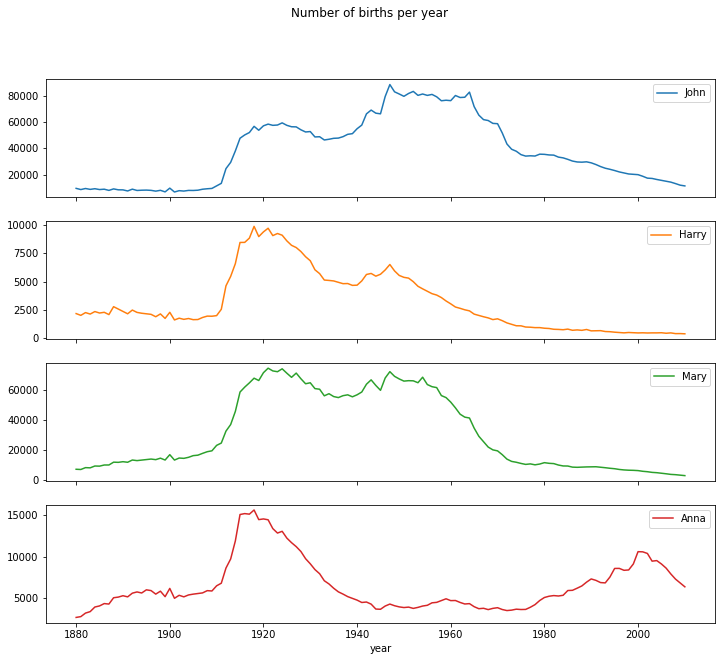

In [21]:
subset = total_births[['John', 'Harry', 'Mary', 'Anna']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

# 评估命名多样性增长
一种解释是父母愿意给小孩起常见的名字越来越少。这个假设可以从数据中得到验证。一个办法是
计算最流行的1000个名字所占的比例

<AxesSubplot:title={'center':'sum of table1000.prop by year and sex '}, xlabel='year'>

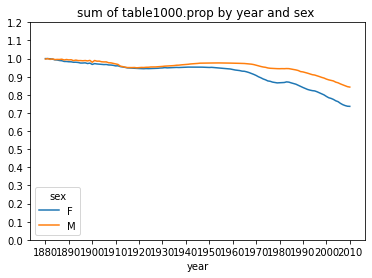

In [22]:
from matplotlib.pyplot import xticks, yticks
import numpy as np

table = top1000.pivot_table("prop",index='year',columns="sex",aggfunc=sum)
table.plot(title="sum of table1000.prop by year and sex ",yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [23]:
# 从图中可以看出，名字的多样性确实出现了增长(前1000项的比例降低)。
# 另一个办法是计算占 总出生人数前50%的不同名字的数量，
df = girls[girls.year ==2010]
df

,name,sex,births,year,prop
259876,Isabella,F,22925,2010,0.012907
259877,Sophia,F,20648,2010,0.011625
259878,Emma,F,17354,2010,0.009770
259879,Olivia,F,17030,2010,0.009588
259880,Ava,F,15436,2010,0.008690
...,...,...,...,...,...
260871,Alaysia,F,252,2010,0.000142
260872,Aleigha,F,252,2010,0.000142
260873,Savanah,F,252,2010,0.000142
260874,Sky,F,252,2010,0.000142


In [24]:
# 在对prop降序排列之后，我们想知道前面多少个名字的人数加起来才够50%。计算prop的累计和cumsum，
# 然后 再通过searchsorted方法找出0.5应该被插入在哪个位置才能保证不破坏顺序:
prop_cumsum = df.sort_values(by="prop",ascending=False).prop.cumsum()
prop_cumsum[:10]

259876    0.012907
259877    0.024531
259878    0.034301
259879    0.043889
259880    0.052580
259881    0.060618
259882    0.068641
259883    0.076066
259884    0.082685
259885    0.088677
Name: prop, dtype: float64

In [25]:
prop_cumsum.values.searchsorted(0.5)

245

In [26]:
# 由于数组索引是从0开始的，因此我们要给这个结果加1，即最终结果为117。拿1900年的数据来 做个比较，这个数字要小得多:
df = girls[girls.year ==1900]
in1900 = df.sort_values(by="prop",ascending=False).prop.cumsum()

In [27]:
in1900.values.searchsorted(0.5)+1

49

In [28]:
def get_quatile_count(group,q= 0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(["year","sex"]).apply(get_quatile_count)
diversity = diversity.unstack("sex")

<AxesSubplot:title={'center':'number of popular names in top 50 %'}, xlabel='year'>

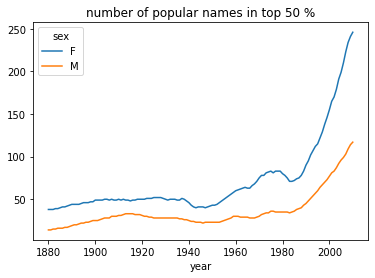

In [29]:
diversity.plot(title="number of popular names in top 50 %")

# “最后一个字母”的变革
首先将全部出生数据在年度、性别以及末字母上进行了聚合:

In [30]:
# 从名字列提取最后一个字母
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = "last_letter"
table = names.pivot_table("births",index=last_letters,columns=["sex","year"],aggfunc=sum)

In [31]:
subtable = table.reindex(columns =[1910,1960, 2010], level='year')

In [32]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691285.0  677176.0    977.0    5214.0   28888.0
b                 NaN     694.0     455.0    411.0    3910.0   39298.0
c                 5.0      49.0     957.0    482.0   15456.0   23360.0
d              6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e            133601.0  435009.0  316921.0  28665.0  178742.0  130325.0

In [33]:
''' 接下来我们需要按总出生数对该表进行规范化处理，以便计算出各性别各末字母占总出生人数的比例'''
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022001.0
     2010    1776223.0
M    1910     194209.0
     1960    2131990.0
     2010    1917416.0
dtype: float64

In [34]:
letter_prop = subtable / subtable.sum()

In [35]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341882  0.381245  0.005031  0.002446  0.015066
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020495
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001846  0.001489  0.113857  0.122940  0.023394
e            0.336947  0.215138  0.178424  0.147599  0.083838  0.067969
f                 NaN  0.000010  0.000055  0.000783  0.004330  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009489  0.001407
h            0.051530  0.036223  0.075998  0.045564  0.037912  0.051821
i            0.001526  0.039963  0.031698  0.000844  0.000610  0.022672
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000355  0.036579  0.049374  0.018531
l            0.043187  0.033871  0.026391  0.065023  0.104892  0.070456
m            0.001200  0.008611  0.002599  0.058046  0.033831  0.024705
n            0.079237  0.130675  0.140052  0.143387  0.152513  0.362416
o            0.001672  0.002440  0.001247  0.017064  0.012841  0.042561
p            0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006766  0.018047  0.064472  0.031044  0.087389
s            0.039036  0.012764  0.013337  0.130797  0.102699  0.065156
t            0.027432  0.015198  0.007839  0.072885  0.065646  0.022861
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007707  0.016182
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152551  0.116758  0.077345  0.161003  0.058203
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

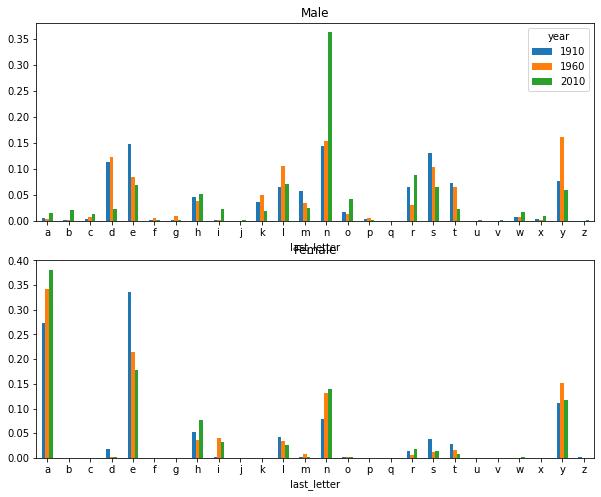

In [36]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [37]:
''' 按年度和性别对其进行规范化处理，并在男孩名字中选取几个字母，最后进行转置以 便将各个列做成一个时间序列:'''
letter_prop = table/table.sum()
dny_ts = letter_prop.loc[["d","n","y"],"M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<AxesSubplot:xlabel='year'>

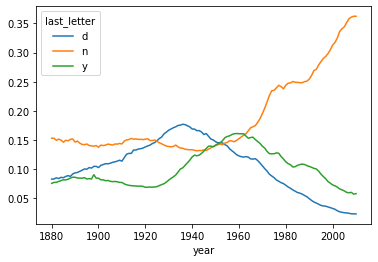

In [38]:
dny_ts.plot()

# 变成女孩名字的男孩名字(以及相反的情况)
另一个有趣的趋势是，早年流行于男孩的名字近年来“变性了”，例如Lesley或Leslie。回到top1000
数据集，找出其中以"lesl"开头的一组名字:

In [39]:
all_names = pd.Series(top1000.name.unique())

In [40]:
lesley_like = all_names[all_names.str.lower().str.contains("lesl")]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4731     Lesli
6106     Lesly
dtype: object

In [41]:
# 然后利用这个结果过滤其他的名字，并按名字分组计算出生数以查看相对频率:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby("name").births.sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    370581
Lesly      10072
Name: births, dtype: int64

In [42]:
'''接下来，我们按性别和年度进行聚合，并按年度进行规范化处理:'''
table  = filtered.pivot_table("births",index="year",columns="sex",aggfunc="sum")
table = table.div(table.sum(1),axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<AxesSubplot:xlabel='year'>

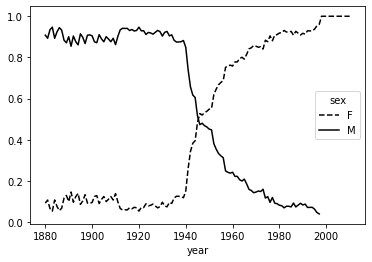

In [43]:
table.plot(style={'M': 'k-', 'F': 'k--'})